<a href="https://colab.research.google.com/github/sindhusatish707/Quantitative-Analysis-of-Stock-Prices/blob/main/Quantitative_analysis_of_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUANTITATIVE ANALYSIS OF STOCK PRICES


*   Can returns be described with normal distribution?
*   Is there directional bias in daily change?
*   Can price movement be described as a random walk?





**Set up the environment**

In [31]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from matplotlib import rcParams
from datetime import datetime
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()

In [32]:
import yfinance as yfin


yfin.pdr_override()

**Download the stock price data, store in data-frame**

In [33]:
spy = pdr.get_data_yahoo('SPY', start='2022-10-24', end='2022-12-23')

[*********************100%***********************]  1 of 1 completed


In [34]:
# let's use the amazon data using yahoo API with pandas data reader
amzn = pdr.get_data_yahoo('AMZN')

[*********************100%***********************]  1 of 1 completed


**Take a look at the data**

In [35]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


**Store instantaneous rate of return in separate series**

In [36]:
# Extract the Close column
amzn_close = amzn['Close']

# Calculate the instantaneous rate of return
amzn_return = np.log(amzn_close).diff()

amzn_return.head()

# The output looks ugly because extracting a single column from pandas data frame it turns it into a series.
# If a neat data is required, we can do pd.DataFrame.np.log(amzn_close).diff()

Date
1997-05-15         NaN
1997-05-16   -0.124461
1997-05-19   -0.012114
1997-05-20   -0.043623
1997-05-21   -0.136269
Name: Close, dtype: float64

**Plot the series**

<Axes: xlabel='Date'>

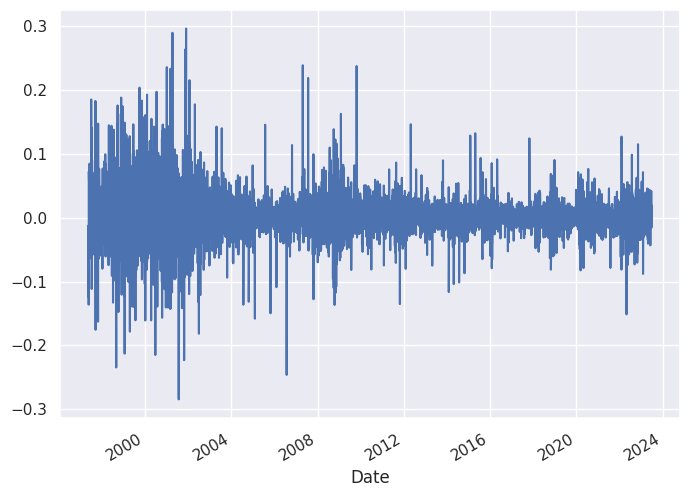

In [37]:
amzn_return.plot()

<Axes: xlabel='Date'>

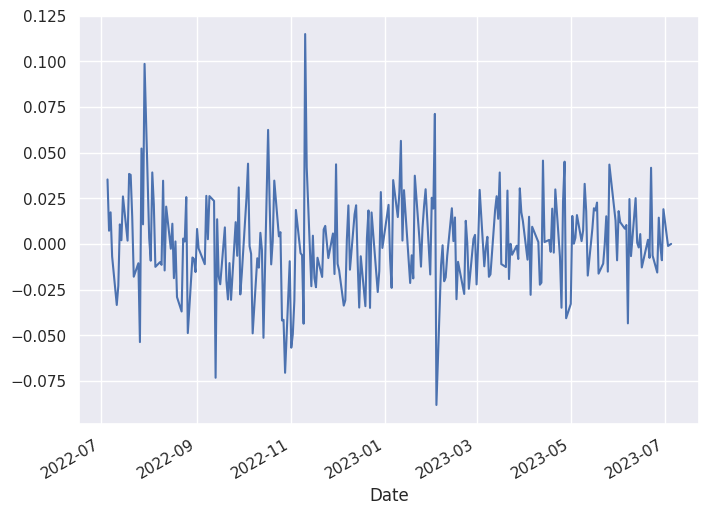

In [38]:
# Plot the last year's data
amzn_return[-252:].plot()

**Pandas describe function gives descriptive statistics, default assumes you are dealing with a sample Pandas also deals with missing values by omitting them**

In [39]:
# basic desriptive statistics
amzn_return.describe()

count    6576.000000
mean        0.001094
std         0.035498
min        -0.284568
25%        -0.013304
50%         0.000414
75%         0.014728
max         0.296181
Name: Close, dtype: float64

**An alternative more slightly different table of descriptive from scipy stats**

In [40]:
from scipy import stats

In [41]:
stats.describe(amzn_return)

DescribeResult(nobs=6577, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

As seen above, neither scipy nor numpy can handle nan values well..
also, observe that numpy shows 6576 and scipy shows 6577. This is because of the first line.
You can get rid of this by doing the following

In [42]:
amzn_return.dropna(inplace = True)
amzn_return.describe()

count    6576.000000
mean        0.001094
std         0.035498
min        -0.284568
25%        -0.013304
50%         0.000414
75%         0.014728
max         0.296181
Name: Close, dtype: float64

In [43]:
stats.describe(amzn_return)

DescribeResult(nobs=6576, minmax=(-0.2845678277981933, 0.2961810679830656), mean=0.0010938164847712048, variance=0.0012600942944090714, skewness=0.4479827778802615, kurtosis=9.225065556381814)

Skewness is positive so, skewed towards the right.

Kurtosis (fischer - which means its normalised hence, the normal kurtosis would be 12.22 but for normalised kurtosis, we subtract 3 and the value is 9.22 excess kurtosis) distribution is much more peaked.

Also, it means there are fatter tails.

Some values are too small so, we can multiply by 100.

In [44]:
# cleanup for better readaility
amzn_return = round(np.log(amzn_close).diff() * 100, 2)

In [45]:
amzn_return.dropna(inplace = True)
amzn_return.describe()

count    6576.000000
mean        0.109416
std         3.549797
min       -28.460000
25%        -1.330000
50%         0.040000
75%         1.470000
max        29.620000
Name: Close, dtype: float64

In [48]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)

# minmax is a tuple so, we can extract them to separate variables
mini, maxi = minmax

# Standard deviation
std = var ** .5

**For comparision, generate random numbers that follow normal distribution**

In [49]:
from scipy.stats import norm
import matplotlib.pyplot as plt

(array([2.000e+00, 4.000e+00, 3.000e+00, 2.600e+01, 5.000e+01, 2.190e+02,
        1.327e+03, 3.980e+03, 7.230e+02, 1.500e+02, 5.100e+01, 2.400e+01,
        1.000e+01, 4.000e+00, 3.000e+00]),
 array([-28.46 , -24.588, -20.716, -16.844, -12.972,  -9.1  ,  -5.228,
         -1.356,   2.516,   6.388,  10.26 ,  14.132,  18.004,  21.876,
         25.748,  29.62 ]),
 <BarContainer object of 15 artists>)

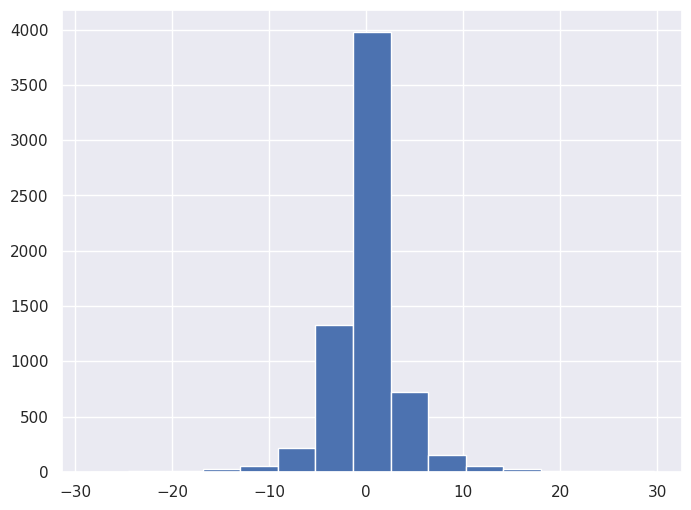

In [50]:
plt.hist(amzn_return, bins = 15)

the output is not very clean. so we can suppress that by adding a ; as seen below.

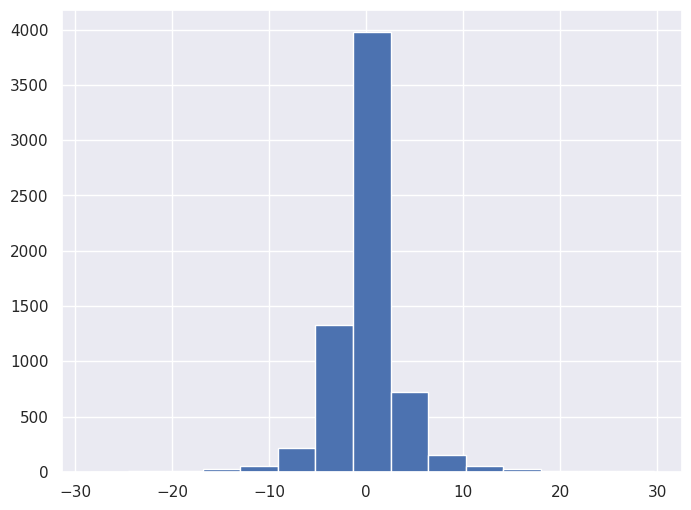

In [51]:
plt.hist(amzn_return, bins = 15);

As expected, a lot of activity in the middle.

The returns are spread out left and right far beyond what is expected in a normal distribution. Usually, the values fall in between +4 to -4. We have some pretty big values indicating the fatter tails.

Let's draw a histogram for normal distribution by doing the following

In [52]:
from scipy.stats import norm

x = norm.rvs(mean, std, n)

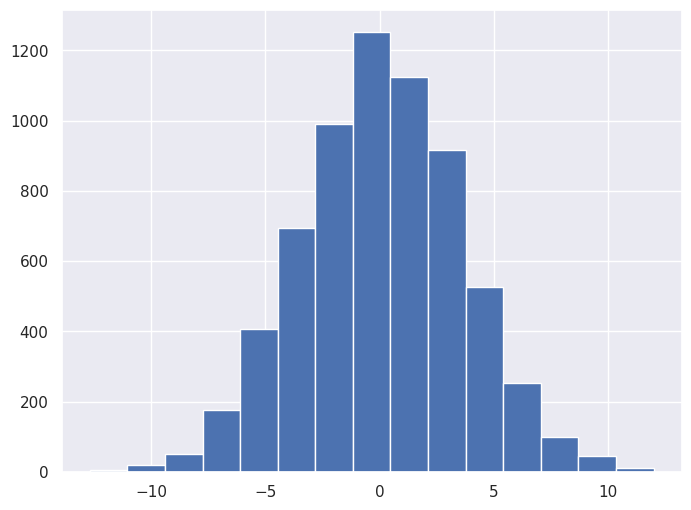

In [54]:
plt.hist(x, bins = 15);

The values are more distributed and are concentrated in the range of -10 to 10. Even though they are spread across a large value, it is still comparitively a lower range as the previous plot was in the range of -30 to 30.

***Is price range normally distributed?***

**Use scipy stats to test the kurtosis, the null hypothesis is that the sample is drawn from a population where the underlysing kurtosis is that of a normally distributed variable**

Now let's run a statistical test on both the data that we jut created and the amzn_return data.
We are using kurtosis test which tests whether or not we can consider the distribution normal.
Now the null hypothesis is that it must be coming from normal distribution and if we have enough evidence, we can reject that depending on the result

In [56]:
# normally distributed
x_test = stats.kurtosistest(x)

# original data
amzn_test = stats.kurtosistest(amzn_return)

#printing in the form of tables for easy comparision
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"*30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:             0.54          0.5875
AMZN:         33.18          0.0000


We get test-statistic and p-value as seen above.
From the data selected from a normally distributed variable, the valus is 0.54. We can't get a lot from that.

When we are testing a hypothesis, most of the time we need a test statistic in excess of -2 or 2 to start rejecting. But we don't know exactly where the critical value is here. So it's much easier to interpret the p-value from kurtosis test which is 0.58. So, if we reject the null hypothesis there's around a 60% chance that we are making a mistake by doing that.

Another interpretation is most hypothesis test coming in would have a alpha of 0.05 and we'd reject the null when p-value is less than 0.05 and not reject when value is greater than 0.05.

Another interpretation is there is about 58 or 59 percent chance that we go the variationwe see from the x varialble from random chance.

Amazon tells a different story.
The statistic is way past -2 or 2. The p-valus is not actually 0. The precision of the test says 0 but it's very very small.

So, by this we are saying that we should reject the null and conclude that the price change of amazon cannot be described as normally distributed.


**Plot histogram of price changes with normal curve overlay**




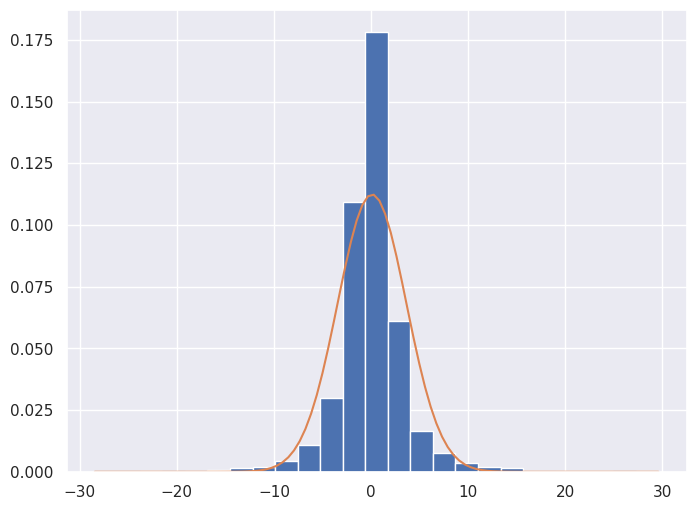

In [57]:
plt.hist(amzn_return, bins = 25, edgecolor = 'w', density = True)

# get limits and equally spaced points. Make an array of 100 equally spaced data points between the min and max
overlay = np.linspace(mini, maxi, 100)

# plot the above generated overlay and use normal probability density function to do this
plt.plot(overlay, norm.pdf(overlay, mean, std))

Observe middle is overly represented here. The bars are greatly exceeding the theoritical and at the edges that things areare overly represented.

We can do t-test on single sample.
Hypothesis we are testing is or the null is that the return is zero. This is a two tailed test. If it's significantly smaller than zero or larger than zero then we are  going to say that yes, there is directional bias here.

***Is daily price change significantly different from zero?***

**Conduct simple hypothesis test**

In [58]:
stats.ttest_1samp(amzn_return, 0, alternative = 'two-sided')

TtestResult(statistic=2.499530609443558, pvalue=0.012459980234837348, df=6575)

p-value is less than 0.05 with value 0.012 so we can reject the null that the price change does not have any directional bias.
The problem is that  sample is so large that we can prove anything.

For t-tst, the sample is too large. But the same is an advantage in a kurtosis test. So we can sample 20% of the data and re run the test.

In [59]:
stats.ttest_1samp(amzn_return.sample(252), 0, alternative = 'two-sided')

TtestResult(statistic=-0.9778542577237685, pvalue=0.3290879346041743, df=251)

Now the values are different. Here there is a 33% chance that if we reject the null that we'll be making a mistake

***Can price movement be described as a random walk?***

If the test is a random walk, it's very difficult to predict.

A good predictor if we have a randomly moving system is going to be to forecast tomorrow's price with today's. We can do so by lagging the price by 1 and then plot 1 against the other to see how well the model fits.

Here, we'll do a simple linear regression model. Does almost the same but looks a little unnecessarily complex

**Create price tage**

Let's take amzn_close data fre=ame and add some columns to it. Add 2 columns by offsetting close by 1 and 2 days

In [62]:
amzn_close = pd.DataFrame(amzn_close, columns = ['Close'])

# add a column by off-setting the value by 1
amzn_close['lag_1'] = amzn_close.Close.shift(1)

# add another column by off-setting the value by 2
amzn_close['lag_2'] = amzn_close.Close.shift(2)

amzn_close.head()

,Close,lag_1,lag_2
Date,,,
1997-05-15,0.097917,NaN,NaN
1997-05-16,0.086458,0.097917,NaN
1997-05-19,0.085417,0.086458,0.097917
1997-05-20,0.081771,0.085417,0.086458
1997-05-21,0.071354,0.081771,0.085417


We are saying that we'll be able to predict Close column with both of lag_1 and lag_2 data points.

numpy does not handle nan. so, we can drop it by doing the following

In [63]:
amzn_close.dropna(inplace = True)
amzn_close.head()

,Close,lag_1,lag_2
Date,,,
1997-05-19,0.085417,0.086458,0.097917
1997-05-20,0.081771,0.085417,0.086458
1997-05-21,0.071354,0.081771,0.085417
1997-05-22,0.069792,0.071354,0.081771
1997-05-23,0.075000,0.069792,0.071354


**Fit a linear regression model**

In [64]:
# use linear algebra model and least sqaures model and use amzn_close lag_1 and 2 cols to predict
np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close['Close'])

<ipython-input-64-547143921f04>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close['Close'])


(array([0.97418799, 0.02597327]),
 array([10454.44069064]),
 2,
 array([6684.92915528,   72.31440846]))

In [65]:
# hiding some of the unwanted values
np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close['Close'], rcond = None)[0]

array([0.97418799, 0.02597327])

Observation: 97% of tomorrows price can be predicted by todays price and rest of it can be predicted with second lag.

Let's fit it to the model and compare how close it is with actual data

In [68]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close['Close'], rcond = None)[0]

In [70]:
# matrix multiply the lags by the output of regression model and we're gonna end up with each day prediction of that price
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)
amzn_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
1997-05-19,0.085417,0.086458,0.097917,0.086770
1997-05-20,0.081771,0.085417,0.086458,0.085458
1997-05-21,0.071354,0.081771,0.085417,0.081879
1997-05-22,0.069792,0.071354,0.081771,0.071636
1997-05-23,0.075000,0.069792,0.071354,0.069844


Let's visualize to see how far off our model is..

<Axes: xlabel='Date'>

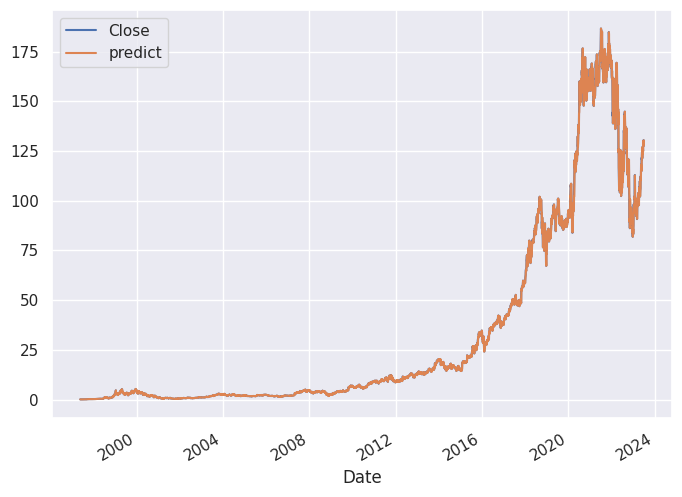

In [71]:
amzn_close[['Close', 'predict']].plot()

They are almost undistinguishable..

Let's take a closer look on where there is a difference

<Axes: xlabel='Date'>

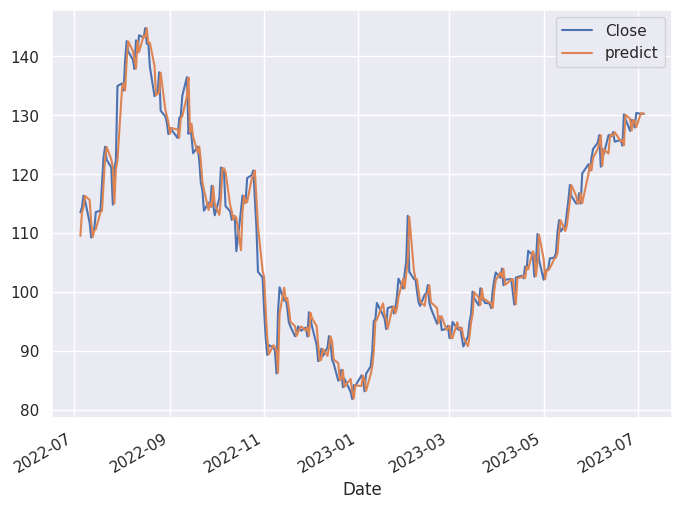

In [72]:
amzn_close.iloc[-252:][['Close', 'predict']].plot()